<img src="figuras/mbit-logo.png" align="right" style="float" width="200">
<font color="#CA3532"><h1 align="left">Clustering</h1></font>

# Vector Quantization Example

In [1]:
# De:
# http://scikit-learn.org/stable/auto_examples/cluster/plot_face_compress.html

A 1024 x 768 size image of a raccoon is used here to illustrate how `k`-means is used for vector quantization.

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn import cluster

from scipy.misc import face
face = face(gray=True)

<ipython-input-2-caa71ad77b40>:8: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = face(gray=True)


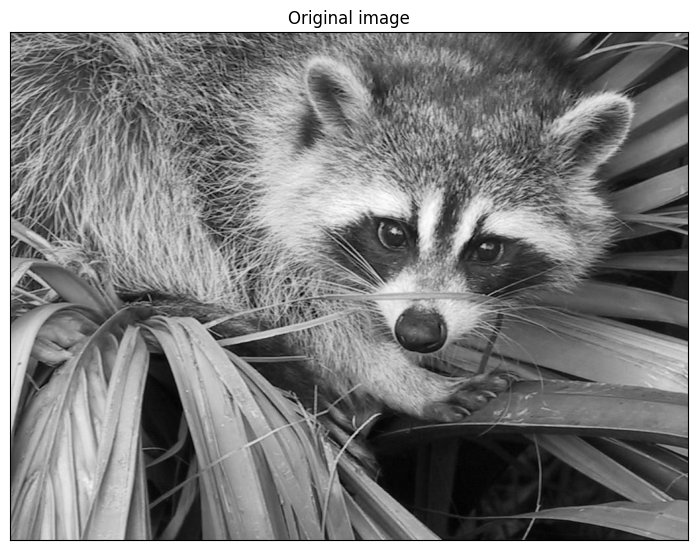

In [5]:
plt.figure(1, figsize=(3*3, 3*2.2))
plt.imshow(face, cmap=plt.cm.gray)
plt.title("Original image")
plt.xticks([])
plt.yticks([]);

In [7]:
face.shape

(768, 1024)

In [11]:
np.unique(face.flatten())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

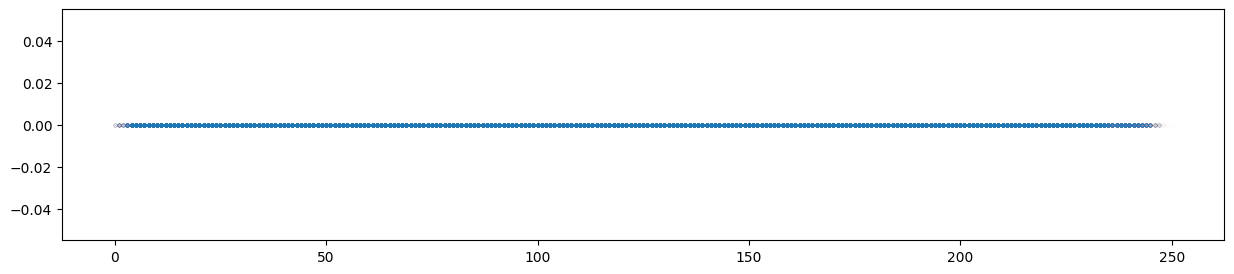

In [21]:
aux = face.flatten()
plt.figure(figsize=(15,3))
plt.plot(aux, 0*aux, ".", alpha=0.002);

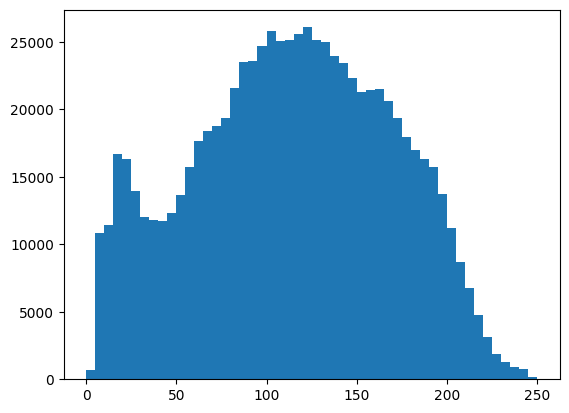

In [23]:
plt.hist(aux, bins=50);

In [12]:
face.flatten()

array([114, 130, 145, ..., 142, 141, 140], dtype=uint8)

In [25]:
face.reshape((-1, 1)).shape

(786432, 1)

In [27]:
n_clusters = 5
np.random.seed(0)

X = face.reshape((-1, 1))  # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=10)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

In [28]:
k_means.cluster_centers_

array([[111.62805703],
       [ 27.11166441],
       [192.8878986 ],
       [ 73.35388722],
       [150.24313581]])

In [34]:
k_means.predict(face.reshape(-1,1))

array([0, 0, 4, ..., 4, 4, 4], dtype=int32)

In [35]:
face[:5]

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       [ 78,  94, 109, ..., 119, 124, 128],
       [ 99, 109, 119, ..., 118, 114, 112]], dtype=uint8)

In [38]:
from tqdm import tqdm

face_compressed = face.copy()
for i in tqdm(range(face.shape[0])): # recorro filas de la imagen
  for j in range(face.shape[1]): # recorro columnas de la imagen
    id_cluster = k_means.predict([[face[i,j]]]) # a qué cluster pertenece ese punto original?
    face_compressed[i,j] = k_means.cluster_centers_[id_cluster][0]

100%|██████████| 768/768 [02:14<00:00,  5.69it/s]


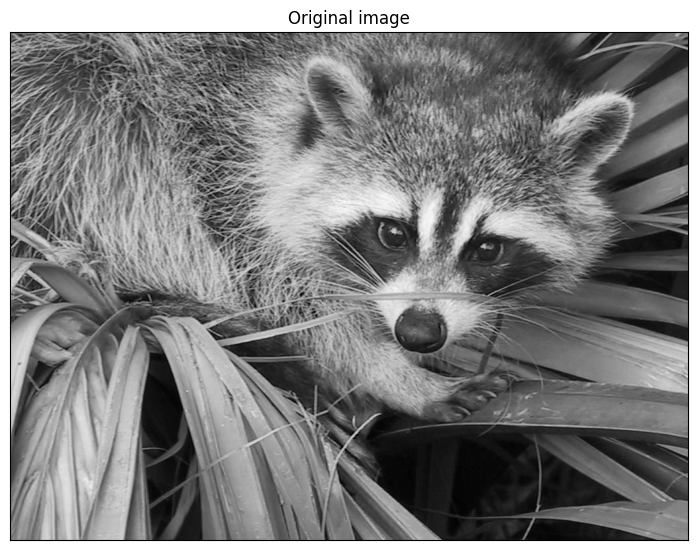

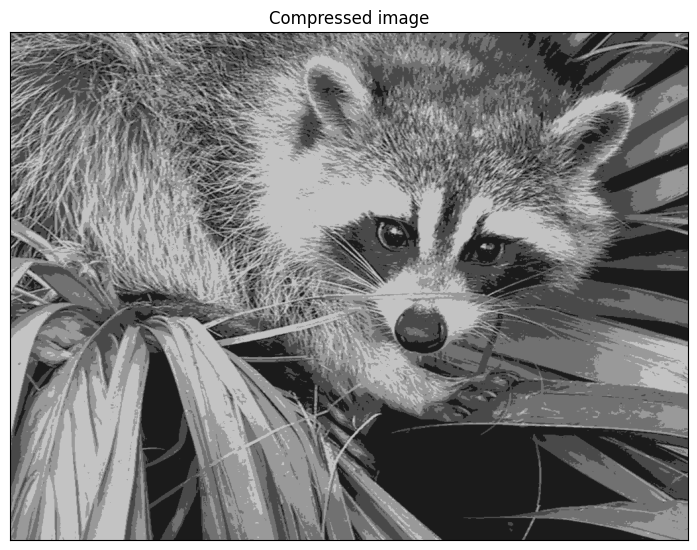

In [40]:
vmin = face.min()
vmax = face.max()

# original image
plt.figure(1, figsize=(3*3, 3*2.2))
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)
plt.title("Original image")
plt.xticks([])
plt.yticks([])

# compressed image
plt.figure(2, figsize=(3*3, 3*2.2))
plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
plt.title("Compressed image")
plt.xticks([])
plt.yticks([]);

In [41]:
# create an array from labels and values
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

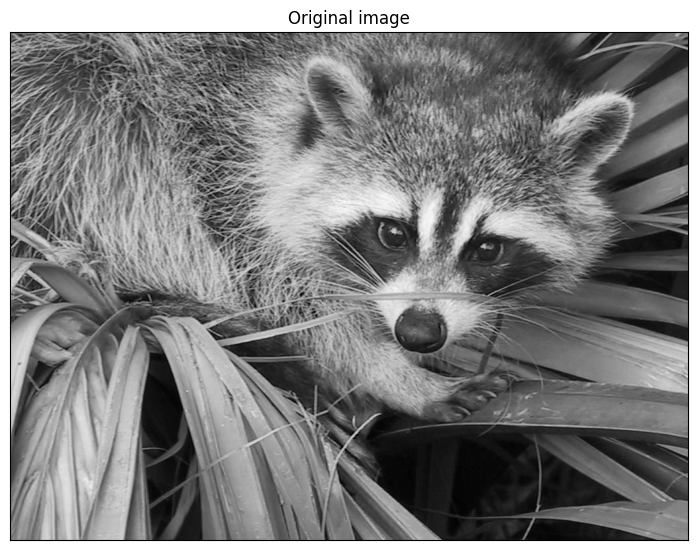

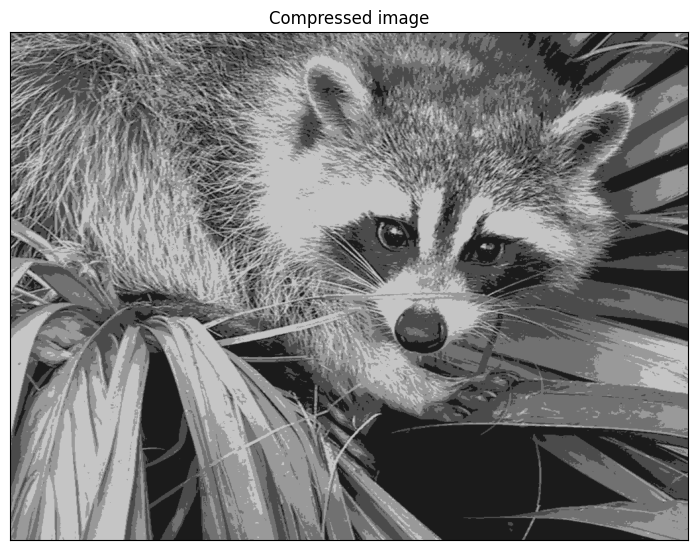

In [42]:
# original image
plt.figure(1, figsize=(3*3, 3*2.2))
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)
plt.title("Original image")
plt.xticks([])
plt.yticks([])

# compressed image
plt.figure(2, figsize=(3*3, 3*2.2))
plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
plt.title("Compressed image")
plt.xticks([])
plt.yticks([]);

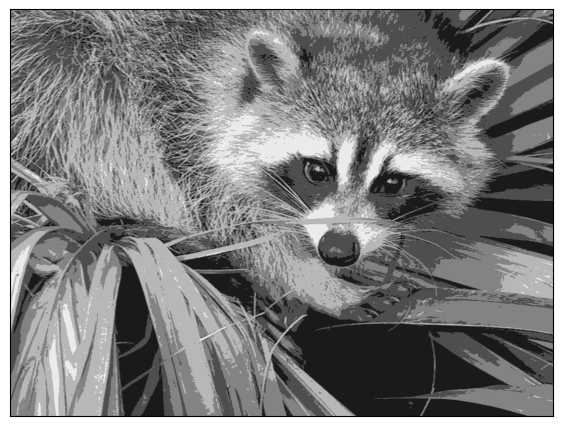

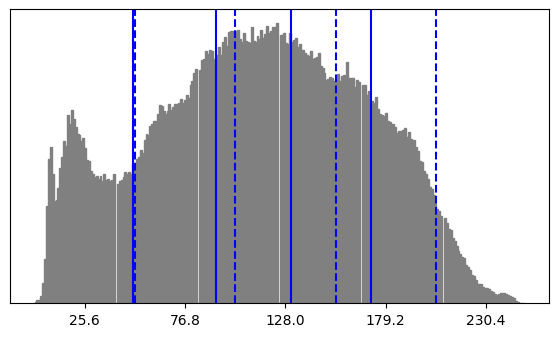

In [43]:
# equal bins image
regular_values = np.linspace(0, 256, n_clusters + 1)
regular_labels = np.searchsorted(regular_values, face) - 1
regular_values = .5 * (regular_values[1:] + regular_values[:-1])  # mean
regular_face = np.choose(regular_labels.ravel(), regular_values, mode="clip")
regular_face.shape = face.shape
plt.figure(figsize=(7,7))
plt.imshow(regular_face, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
plt.xticks([])
plt.yticks([])

# histogram
plt.figure(figsize=(5.5,3))
plt.axes([.01, .01, .98, .98])
plt.hist(X, bins=256, color='.5', edgecolor='.5')
plt.yticks(())
plt.xticks(regular_values)
values = np.sort(values)
for center_1, center_2 in zip(values[:-1], values[1:]):
    plt.axvline(.5 * (center_1 + center_2), color='b')

for center_1, center_2 in zip(regular_values[:-1], regular_values[1:]):
    plt.axvline(.5 * (center_1 + center_2), color='b', linestyle='--')